#  Processamento de linguagem natural com Python

In [239]:
# Importações das bibliotecas

import bs4 as bs # leitura e processamento de dados na web
import urllib.request # fazer requisição na internet

# bibliotecas de linguagem natural
import nltk
import spacy

In [240]:
# Baixando pacotes para usar spacy em português do Brasil

!python3 -m spacy download pt_core_news_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-3.7.0/pt_core_news_sm-3.7.0-py3-none-any.whl (13.0 MB)
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Marcação POS

- POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
- Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém
- Lista de tokens: https://spacy.io/api/annotation#pos-tagging
- Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/

In [241]:
pln = spacy.load('pt_core_news_sm')
pln

In [242]:
documento = pln('Estou aprendendo processamento de linguagem natural, eu sou o Kaique.')
type(documento)

spacy.tokens.doc.Doc

In [243]:
# Percorre o documento mostrando o texto e como é classificado

for token in documento:
    print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
eu PRON
sou AUX
o DET
Kaique PROPN
. PUNCT


## Lematização e stemização

In [244]:
# Recupera e imprime o lema do token. O lema é a forma base ou dicionário de uma palavra

for token in documento:
    print(token.text, token.lemma_)

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
eu eu
sou ser
o o
Kaique Kaique
. .


In [245]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'curso',
 'cursar']

In [246]:
# Stemitização

import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [247]:
# O método stem recebe uma palavra como entrada e aplica uma série de regras
# para remover sufixos e prefixos, com o objetivo de obter a forma radical da palavra.

stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [248]:
# Texto Original, Lemma e Stem

for token in documento:
    print(token.text, ' - ', token.lemma_, ' - ', stemmer.stem(token.text))

Estou  -  estar  -  est
aprendendo  -  aprender  -  aprend
processamento  -  processamento  -  process
de  -  de  -  de
linguagem  -  linguagem  -  lingu
natural  -  natural  -  natur
,  -  ,  -  ,
eu  -  eu  -  eu
sou  -  ser  -  sou
o  -  o  -  o
Kaique  -  Kaique  -  kaiqu
.  -  .  -  .


## Carregamento dos textos

In [249]:
# Variável chamada dados que abre um artigo de inteligência artificial do wikipedia

dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [250]:
# Fazendo leitura dos arquivo

dados = dados.read()

In [251]:
# Fazendo leitura do código HTML

dados_html = bs.BeautifulSoup(dados, 'lxml')
# 'lxml', é o analisador (parser) que o BeautifulSoup usará para analisar o conteúdo HTML. O 'lxml' é um analisador rápido e eficiente que oferece suporte a muitos recursos avançados do HTML.

In [252]:
# Criando variável que vai receber todos os paragráfos(que são onde estão os conteúdos da página)

paragrafos = dados_html.find_all('p')
len(paragrafos)

64

In [253]:
# Criando um for para percorrer os parágrafos e extrair somente os conteúdos

conteudos = ''

for p in paragrafos:
    conteudos += p.text # o text retira a tag <p> e obtém somente o texto em si

In [254]:
# Transformando todos os textos extraídos em letras minúsculas

conteudos = conteudos.lower()

## Buscas em textos com spaCy

In [255]:
# Carregando modelo de linguagem

pln = spacy.load('pt_core_news_sm')
pln

In [256]:
# Criando a String de Pesquisa

string = 'turing'
token_pesquisa = pln(string)

In [257]:
# Criando um PhraseMatcher, ferramenta que permite realizar buscas eficientes em textos

from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [258]:
#  Processando Texto e Procurando Correspondências

doc = pln(conteudos)
matches = matcher(doc)
matches

[(8661325627334373315, 3463, 3464),
 (8661325627334373315, 3473, 3474),
 (8661325627334373315, 3629, 3630),
 (8661325627334373315, 3634, 3635),
 (8661325627334373315, 3640, 3641),
 (8661325627334373315, 3703, 3704),
 (8661325627334373315, 4356, 4357),
 (8661325627334373315, 5564, 5565),
 (8661325627334373315, 5699, 5700),
 (8661325627334373315, 5794, 5795),
 (8661325627334373315, 5911, 5912)]

In [259]:
doc[3463:3464], doc[3473:3474]

(turing, turing)

In [260]:
# Posição inicial

print(matches[0][1]) # primeira linha, onde começa a palavra

# Posição final

print(matches[0][2]) # primeira linha, onde termina a palavra

3463
3464


In [ ]:
# Gerando códidos HTML dentro do Python para melhorar a visualização

from IPython.core.display import HTML
texto = ''
numero_palavras = 50 # quantas palavras antes e depois da palavra alvo
doc = pln(conteudos) # texto que vai ser varrido
matches = matcher(doc) # procurando a palavra 'turing' no documento

display(HTML(f'<h1>{string.upper()}</h1>')) # criando um 'título' com a variável que foi pesquisada
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))

for i in matches: # varrendo os resultados

  inicio = i[1] - numero_palavras # pegando a palavra alvo e as 50 anteriores definida na variável
  if inicio < 0: # se achou a palavra no começo do paragrafo então quer dizer que não existe palavras anteriores
    inicio = 0 # indicando que o ínicio vai ser 0 para não ocorrer erro

  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>") # achando as 50 palavras a frente da posiçao inicial do alvo e fazendo uma marcação
  texto += "<br /><br />" # quebrar a linha quando terminar de achar as 50 próximas

# printando todo o texto varrido no fim do for
display(HTML(f"""... {texto} ... """))

## Extração de entidades nomeadas

- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities

In [262]:
for entidade in doc.ents: # 'doc' é a variável que recebeu os parágrafos
    print(entidade.text, '-', entidade.label_)

# O rótulo indica a categoria da entidade
# A biblioteca spaCy possui diversos rótulos pré-definidos, como:

# PERSON (pessoa)
# LOCATION (localização)
# ORGANIZATION (organização)
# DATE (data)
# TIME (hora)
# MONEY (dinheiro)
# PERCENT (porcentagem)

pensamento:[1 - MISC
segunda guerra mundial - MISC
computing machinery and intelligence - MISC
alan - PER
herbert simon - PER
allen newell - PER
john mccarthy - PER
warren mcculloch - PER
walter pitts - PER
marvin minsky - PER
frankenstein - MISC
aristóteles - PER
alexandre - PER
herbert simon - PER
john mccarthy - PER
brasil - LOC
allen newell - PER
herbert simon - PER
mccarty - PER
marvin minsky - PER
mit - ORG
darthmouth - LOC
estados unidos - LOC
fifth generation - MISC
japão - LOC
prolog - MISC
gpt-3[21 - MISC
google - ORG
wikipédia - MISC
john mccarthy - PER
andreas kaplan - PER
michael haenlein definem - PER
john mccarthy - PER
john haugeland - PER
good - PER
w. grey walter - PER
besta de johns hopkins - ORG
universidade de princeton - LOC
ratio club - LOC
inglaterra - LOC
david rumelhart - PER
isaac asimov - PER
steven spielberg - PER
robótica.[8 - ORG
stephen hawking - PER
alan turing - PER
turing - PER
turing - PER
turing - PER
turing - PER
turing - PER
joseph weizenbaum - PE

In [ ]:
# Marcando o texto conforme a a categoria da entidade

from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

## Nuvem de palavras e stop words

In [264]:
# Removendo Stop Words

from spacy.lang.pt.stop_words import STOP_WORDS
len(STOP_WORDS)

416

In [265]:
# Verificando se certa palavra é stop word

pln.vocab['usa'].is_stop

True

In [266]:
# Convertendo todo o texto para o formato spacy

doc = pln(conteudos)
lista_token = []
for token in doc:
  lista_token.append(token.text)
len(lista_token)

6307

In [267]:
# Removendo as stops word

sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)
len(sem_stop)

3644

In [268]:
# Nuvem de palavras
# Definindo as cores das palavras na nuvem de palavras

from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [269]:
# Criando a nuvem de palavras

from wordcloud import WordCloud
cloud = WordCloud(background_color= 'white', max_words= 100, colormap=color_map)

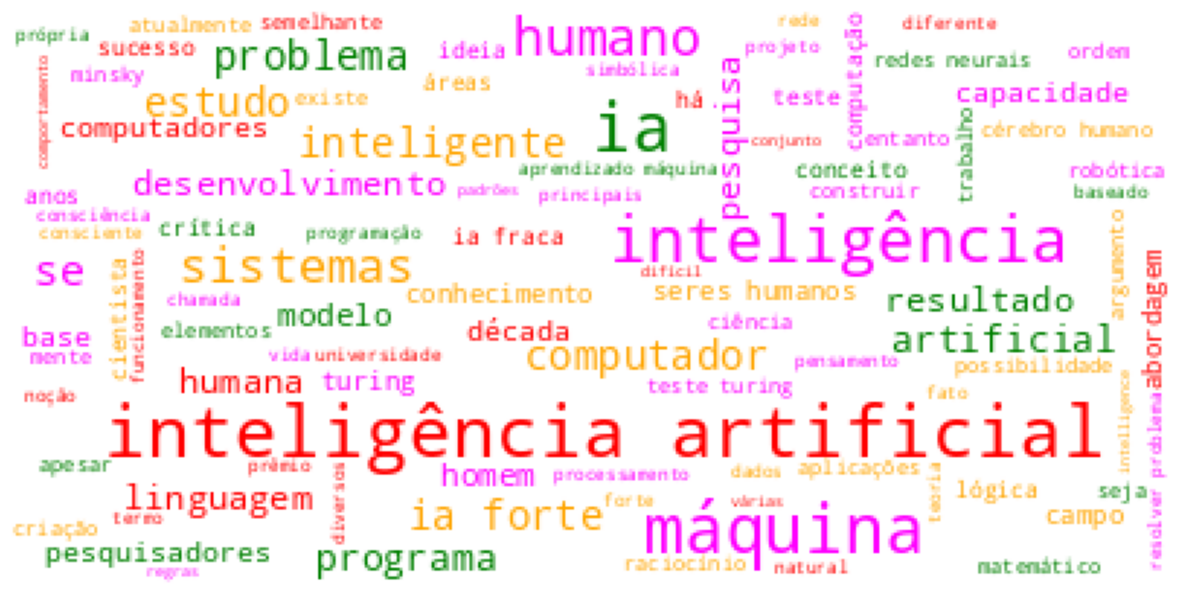

In [270]:
# Passando os textos e mostrando a nuvem de palavras

import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()